


<h1><center>Tiền xử lý dữ liệu cho dữ liệu về dự đoán phim xu hướng </center></h1>

<h1>Nội dung thực hành</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">Giới thiệu về dữ liệu</a></li>
        <li><a href="#downloading_data">Tải dữ liệu</a></li>
        <li><a href="#pre-processing">Tiền xử lý dữ liệu</a></li>
    </ol>
</div>
<br>
<hr>

Import các thư viện sau:
<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
</ul>

In [22]:
import numpy as np
import pandas as pd

# 🎬 Giới thiệu về Dữ liệu MovieLens

- **Nguồn dữ liệu**:  
  Bộ dữ liệu MovieLens được cung cấp bởi **GroupLens Research**, là một trong những bộ dữ liệu nổi tiếng nhất cho các bài toán hệ thống gợi ý.

- **Mục đích sử dụng**:  
  MovieLens được sử dụng để **huấn luyện và đánh giá** các mô hình gợi ý.

- **Cấu trúc dữ liệu**:
  - `movies.csv`: Thông tin phim gồm:
    - `movieId`: ID của phim
    - `title`: Tên phim
    - `genres`: Thể loại (nhiều thể loại cách nhau bằng dấu `|`)
  - `ratings.csv`: Thông tin đánh giá gồm:
    - `userId`: ID người dùng
    - `movieId`: ID phim
    - `rating`: Điểm đánh giá (từ 0.5 đến 5.0, bước 0.5)
    - `timestamp`: Thời gian đánh giá
  - `tags.csv`: Thẻ người dùng gán cho phim gồm:
    - `userId`, `movieId`, `tag`, `timestamp`

## 🏷️ Gợi ý về Nhãn (Labels)

- **Dự đoán điểm đánh giá (Regression)**:
  - Sử dụng trực tiếp cột `rating` làm nhãn (`label`) trong bài toán hồi quy.
  - Ví dụ: Dự đoán người dùng A sẽ cho phim X bao nhiêu điểm.

- **Phân loại thích / không thích (Classification)**:
  - Gán nhãn nhị phân:
    - Nếu `rating >= 4.0` → `label = 1` (thích)
    - Nếu `rating < 4.0` → `label = 0` (không thích)
  - Phù hợp cho các mô hình phân loại nhị phân.

- **Gợi ý hành vi tiếp theo (Sequence Prediction)**:
  - Với lịch sử xem phim theo thời gian, có thể xây dựng bài toán gợi ý **phim kế tiếp** mà người dùng có khả năng xem.
  - Nhãn trong trường hợp này sẽ là `movieId` của phim tiếp theo trong chuỗi hành vi người dùng.

---


<div id="downloading_data"> 
    <h2>Load dữ liệu từ file</h2>
<!--     Sử dụng wget để tải dữ liệu từ IBM Object Storage. -->
</div>

Đọc dữ liệu vào pandas dataframe

In [23]:
# Đọc các file CSV
movies = pd.read_csv('data/movies.csv', usecols=['movieId', 'genres'])
ratings = pd.read_csv('data/ratings.csv', usecols=['movieId', 'rating','userId'])


Kích thước của dữ liệu

In [24]:
ratings.shape

(32000204, 3)

In [25]:
ratings.head(10)

,userId,movieId,rating
0,1,17,4.00
1,1,25,1.00
2,1,29,2.00
3,1,30,5.00
4,1,32,5.00
5,1,34,2.00
6,1,36,1.00
7,1,80,5.00
8,1,110,3.00
9,1,111,5.00


In [26]:
num_users = ratings['userId'].nunique()
num_movies = ratings['movieId'].nunique()
print(f"Số lượng người dùng: {num_users}")
print(f"Số lượng phim: {num_movies}")

Số lượng người dùng: 200948
Số lượng phim: 84432


In [27]:
ratings.dtypes

userId       int64
movieId      int64
rating     float64
dtype: object

In [28]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [29]:
ratings.describe()

,userId,movieId,rating
count,32000204.00,32000204.00,32000204.00
mean,100278.51,29318.61,3.54
std,57949.05,50958.16,1.06
min,1.00,1.00,0.50
25%,50053.00,1233.00,3.00
50%,100297.00,3452.00,3.50
75%,150451.00,44199.00,4.00
max,200948.00,292757.00,5.00


In [30]:
movies.shape

(87585, 2)

In [31]:
movies.head(10)

,movieId,genres
0,1,Adventure|Animation|Children|Comedy|Fantasy
1,2,Adventure|Children|Fantasy
2,3,Comedy|Romance
3,4,Comedy|Drama|Romance
4,5,Comedy
5,6,Action|Crime|Thriller
6,7,Comedy|Romance
7,8,Adventure|Children
8,9,Action
9,10,Action|Adventure|Thriller


<div href="pre-processing">
    <h2>Tiền xử lý dữ liệu</h2>
</div>

 ## 📊 Xử lý genres thành vector dạng số (one-hot)
 - 🎯 Mục tiêu:
Từ Adventure|Animation|Children|Comedy|Fantasy

Thành column tương ứng với các thể loại phim

In [32]:
movies['genres_list'] = movies['genres'].str.split('|')

# Lấy danh sách tất cả thể loại duy nhất
all_genres = sorted(set(genre for genres in movies['genres_list'] for genre in genres))

for genre in all_genres:
    movies[genre] = movies['genres_list'].apply(lambda x: int(genre in x))

movies.drop(columns='genres_list', inplace=True)
movies.drop(columns='genres', inplace=True)


In [33]:
movies.head(10)

,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6,7,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,8,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
movies.dtypes

movieId               int64
(no genres listed)    int64
Action                int64
Adventure             int64
Animation             int64
Children              int64
Comedy                int64
Crime                 int64
Documentary           int64
Drama                 int64
Fantasy               int64
Film-Noir             int64
Horror                int64
IMAX                  int64
Musical               int64
Mystery               int64
Romance               int64
Sci-Fi                int64
Thriller              int64
War                   int64
Western               int64
dtype: object

<Axes: >

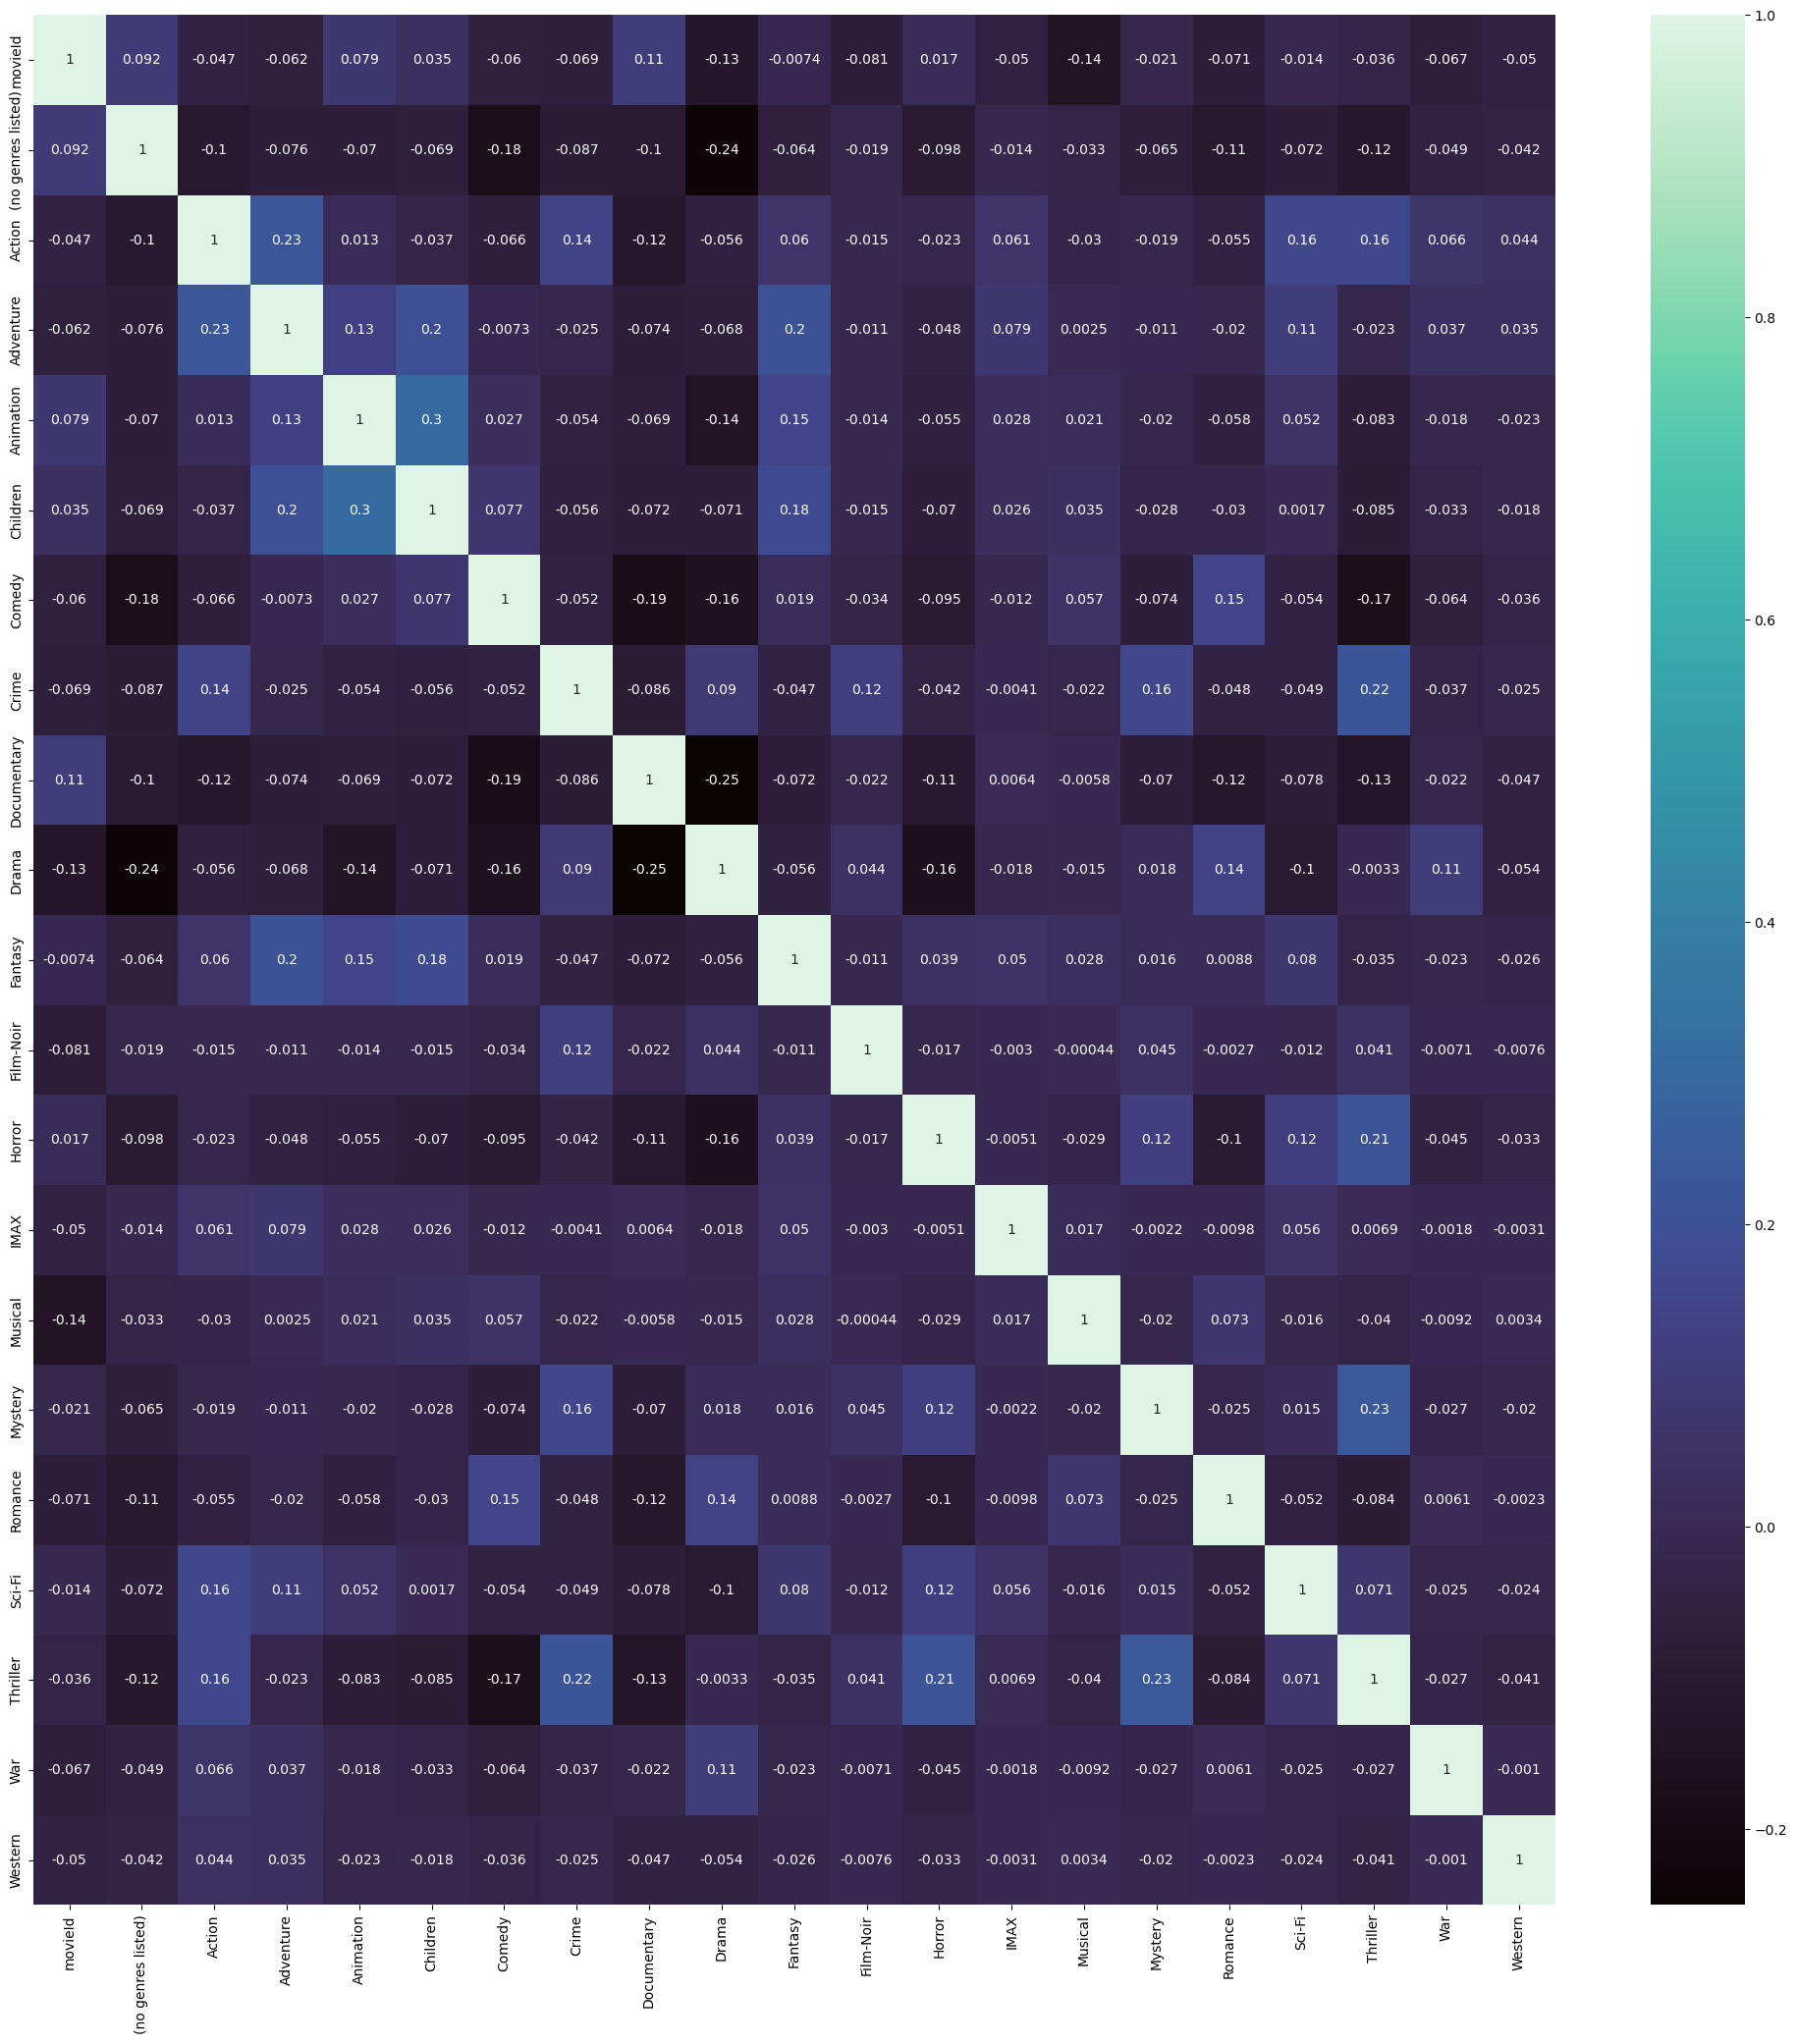

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation = movies.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(correlation, annot=True, cmap='mako')

## ✅ Mục tiêu: Chuẩn hóa cột tag trong bảng tags
🎯 Các bước chuẩn hóa:
Loại bỏ giá trị null


In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
import re

In [38]:
# tag_encoder = LabelEncoder()
# tags['tag_encoded'] = tag_encoder.fit_transform(tags['tag_cleaned'])
# tags.drop(columns='tag_cleaned', inplace=True)
# tags.drop(columns='tag', inplace=True)

In [39]:
# tags.head(10)

## Dự đoán điểm đánh giá + Gợi ý danh sách phim
Label: rating (giá trị thực, thường từ 0.5 đến 5.0)

Input: userId, movieId, genre, tag, etc.

👉 Bài toán học có giám sát, hồi quy.

In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
from torch_geometric.data import Data
from torch_geometric.nn import LightGCN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [47]:
# Mã hóa userId và movieId
user_encoder = LabelEncoder()
movie_encoder = LabelEncoder()

ratings['userId'] = user_encoder.fit_transform(ratings['userId'])
ratings['movieId'] = movie_encoder.fit_transform(ratings['movieId'])

# Số lượng người dùng và phim
num_users = len(user_encoder.classes_)
num_movies = len(movie_encoder.classes_)
print(f"Số lượng người dùng: {num_users}")
print(f"Số lượng phim: {num_movies}")

# Xử lý đặc trưng thể loại phim
genre_columns = movies.columns.drop(['movieId', '(no genres listed)'])
movie_features_genres = torch.tensor(movies[genre_columns].values, dtype=torch.float)

# Chuyển movie_features_genres thành tensor thưa
num_genres = len(genre_columns)
genre_indices = []
genre_values = []
for i in range(num_movies):
    for j in range(num_genres):
        if movie_features_genres[i, j] != 0:
            genre_indices.append([i, j])
            genre_values.append(movie_features_genres[i, j])

genre_indices = torch.tensor(genre_indices, dtype=torch.long).t()
genre_values = torch.tensor(genre_values, dtype=torch.float)
movie_features_genres_sparse = torch.sparse_coo_tensor(genre_indices, genre_values, (num_movies, num_genres))

Số lượng người dùng: 200948
Số lượng phim: 84432


In [48]:
# Tạo cạnh (edge): (user_id, movie_id)
edge_index = torch.tensor([ratings['userId'].values, ratings['movieId'].values + num_users], dtype=torch.long)

# Trọng số cạnh (rating)
edge_weight = torch.tensor(ratings['rating'].values, dtype=torch.float)

# Tạo đặc trưng cho người dùng (vector 0)
user_indices = torch.tensor([[], []], dtype=torch.long)
user_values = torch.tensor([], dtype=torch.float)
user_features = torch.sparse_coo_tensor(user_indices, user_values, (num_users, num_genres))

# Sử dụng đặc trưng phim đã tạo
genre_columns = movies.columns.drop('movieId','(no genres listed)')  
movie_features_genres = torch.tensor(movies[genre_columns].values, dtype=torch.float)
movie_features = movie_features_genres

# Kết hợp đặc trưng của người dùng và phim
user_indices_adjusted = user_features._indices()
movie_indices_adjusted = movie_features._indices().clone()
movie_indices_adjusted[0] += num_users
x_indices = torch.cat([user_indices_adjusted, movie_indices_adjusted], dim=1)
x_values = torch.cat([user_features._values(), movie_features._values()])
x = torch.sparse_coo_tensor(x_indices, x_values, (num_users + num_movies, num_genres))

# Tạo đối tượng Data
data = Data(x=x, edge_index=edge_index, edge_attr=edge_weight)

NotImplementedError: Could not run 'aten::_indices' with arguments from the 'CPU' backend. This could be because the operator doesn't exist for this backend, or was omitted during the selective/custom build process (if using custom build). If you are a Facebook employee using PyTorch on mobile, please visit https://fburl.com/ptmfixes for possible resolutions. 'aten::_indices' is only available for these backends: [Meta, SparseCPU, SparseMeta, BackendSelect, Python, FuncTorchDynamicLayerBackMode, Functionalize, Named, Conjugate, Negative, ZeroTensor, ADInplaceOrView, AutogradOther, AutogradCPU, AutogradCUDA, AutogradHIP, AutogradXLA, AutogradMPS, AutogradIPU, AutogradXPU, AutogradHPU, AutogradVE, AutogradLazy, AutogradMTIA, AutogradPrivateUse1, AutogradPrivateUse2, AutogradPrivateUse3, AutogradMeta, AutogradNestedTensor, Tracer, AutocastCPU, AutocastXPU, AutocastMPS, AutocastCUDA, FuncTorchBatched, BatchedNestedTensor, FuncTorchVmapMode, Batched, VmapMode, FuncTorchGradWrapper, PythonTLSSnapshot, FuncTorchDynamicLayerFrontMode, PreDispatch, PythonDispatcher].

Meta: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\MetaFallbackKernel.cpp:23 [backend fallback]
SparseCPU: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\build\aten\src\ATen\RegisterSparseCPU.cpp:1407 [kernel]
SparseMeta: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\build\aten\src\ATen\RegisterSparseMeta.cpp:291 [kernel]
BackendSelect: fallthrough registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\BackendSelectFallbackKernel.cpp:3 [backend fallback]
Python: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\PythonFallbackKernel.cpp:194 [backend fallback]
FuncTorchDynamicLayerBackMode: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\functorch\DynamicLayer.cpp:503 [backend fallback]
Functionalize: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\build\aten\src\ATen\RegisterFunctionalization_2.cpp:23834 [kernel]
Named: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\NamedRegistrations.cpp:7 [backend fallback]
Conjugate: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\ConjugateFallback.cpp:17 [backend fallback]
Negative: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\NegateFallback.cpp:18 [backend fallback]
ZeroTensor: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\ZeroTensorFallback.cpp:86 [backend fallback]
ADInplaceOrView: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\ADInplaceOrViewType_0.cpp:4942 [kernel]
AutogradOther: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\VariableType_1.cpp:16915 [autograd kernel]
AutogradCPU: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\VariableType_1.cpp:16915 [autograd kernel]
AutogradCUDA: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\VariableType_1.cpp:16915 [autograd kernel]
AutogradHIP: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\VariableType_1.cpp:16915 [autograd kernel]
AutogradXLA: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\VariableType_1.cpp:16915 [autograd kernel]
AutogradMPS: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\VariableType_1.cpp:16915 [autograd kernel]
AutogradIPU: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\VariableType_1.cpp:16915 [autograd kernel]
AutogradXPU: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\VariableType_1.cpp:16915 [autograd kernel]
AutogradHPU: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\VariableType_1.cpp:16915 [autograd kernel]
AutogradVE: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\VariableType_1.cpp:16915 [autograd kernel]
AutogradLazy: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\VariableType_1.cpp:16915 [autograd kernel]
AutogradMTIA: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\VariableType_1.cpp:16915 [autograd kernel]
AutogradPrivateUse1: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\VariableType_1.cpp:16915 [autograd kernel]
AutogradPrivateUse2: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\VariableType_1.cpp:16915 [autograd kernel]
AutogradPrivateUse3: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\VariableType_1.cpp:16915 [autograd kernel]
AutogradMeta: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\VariableType_1.cpp:16915 [autograd kernel]
AutogradNestedTensor: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\VariableType_1.cpp:16915 [autograd kernel]
Tracer: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\TraceType_1.cpp:16106 [kernel]
AutocastCPU: fallthrough registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\autocast_mode.cpp:322 [backend fallback]
AutocastXPU: fallthrough registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\autocast_mode.cpp:465 [backend fallback]
AutocastMPS: fallthrough registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\autocast_mode.cpp:209 [backend fallback]
AutocastCUDA: fallthrough registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\autocast_mode.cpp:165 [backend fallback]
FuncTorchBatched: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\functorch\LegacyBatchingRegistrations.cpp:731 [backend fallback]
BatchedNestedTensor: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\functorch\LegacyBatchingRegistrations.cpp:758 [backend fallback]
FuncTorchVmapMode: fallthrough registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\functorch\VmapModeRegistrations.cpp:27 [backend fallback]
Batched: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\LegacyBatchingRegistrations.cpp:1075 [backend fallback]
VmapMode: fallthrough registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\VmapModeRegistrations.cpp:33 [backend fallback]
FuncTorchGradWrapper: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\functorch\TensorWrapper.cpp:207 [backend fallback]
PythonTLSSnapshot: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\PythonFallbackKernel.cpp:202 [backend fallback]
FuncTorchDynamicLayerFrontMode: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\functorch\DynamicLayer.cpp:499 [backend fallback]
PreDispatch: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\PythonFallbackKernel.cpp:206 [backend fallback]
PythonDispatcher: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\PythonFallbackKernel.cpp:198 [backend fallback]


In [45]:
# Chia dữ liệu train/test (80/20)
train_edge_index, test_edge_index, train_edge_weight, test_edge_weight = train_test_split(
    edge_index.t().numpy(), edge_weight.numpy(), test_size=0.2, random_state=42
)

# Chuyển lại thành tensor
train_edge_index = torch.tensor(train_edge_index, dtype=torch.long).t()
test_edge_index = torch.tensor(test_edge_index, dtype=torch.long).t()
train_edge_weight = torch.tensor(train_edge_weight, dtype=torch.float)
test_edge_weight = torch.tensor(test_edge_weight, dtype=torch.float)

# Tạo dữ liệu train/test
train_data = Data(x=x, edge_index=train_edge_index, edge_attr=train_edge_weight)
test_data = Data(x=x, edge_index=test_edge_index, edge_attr=test_edge_weight)

# Loại bỏ cạnh không hợp lệ
num_nodes = num_users + num_movies
valid_indices = (train_data.edge_index[0] < num_nodes) & (train_data.edge_index[1] < num_nodes)
train_data.edge_index = train_data.edge_index[:, valid_indices]
train_data.edge_attr = train_data.edge_attr[valid_indices]

valid_indices_test = (test_data.edge_index[0] < num_nodes) & (test_data.edge_index[1] < num_nodes)
test_data.edge_index = test_data.edge_index[:, valid_indices_test]
test_data.edge_attr = test_data.edge_attr[valid_indices_test]

# Kiểm tra
print("Max index in train_data.edge_index:", train_data.edge_index.max().item())
print("Min index in train_data.edge_index:", train_data.edge_index.min().item())
assert train_data.edge_index.max().item() <= num_nodes - 1, "Chỉ số vượt quá số node!"
print(f"Số cạnh train: {train_data.edge_index.shape[1]}")
print(f"Số cạnh test: {test_data.edge_index.shape[1]}")

In [ ]:
class LightGCNRecommender(nn.Module):
    def __init__(self, num_nodes, embedding_dim, num_layers):
        super(LightGCNRecommender, self).__init__()
        self.embedding = nn.Embedding(num_nodes, embedding_dim)
        self.num_layers = num_layers
        self.num_nodes = num_nodes
        nn.init.normal_(self.embedding.weight, std=0.1)
    
    def forward(self, edge_index):
        x = self.embedding.weight
        x_0 = x
        for _ in range(self.num_layers):
            x = self.propagate(x, edge_index)
        x = (x_0 + x) / (self.num_layers + 1)
        return x
    
    def propagate(self, x, edge_index):
        src, dst = edge_index
        assert src.max() < self.num_nodes, f"src index {src.max()} vượt quá {self.num_nodes}"
        assert dst.max() < self.num_nodes, f"dst index {dst.max()} vượt quá {self.num_nodes}"
        
        src_emb = x[src]
        row_sum = torch.zeros(self.num_nodes, x.shape[1]).to(x.device)
        row_sum.index_add_(0, src, src_emb)
        row_count = torch.zeros(self.num_nodes).to(x.device)
        row_count.index_add_(0, src, torch.ones_like(src, dtype=torch.float))
        x = row_sum / (row_count.unsqueeze(1) + 1e-10)
        return x

Max index in train_data.edge_index: 285355
Min index in train_data.edge_index: 1
Số lượng cạnh trong tập train: 5501941
Số lượng cạnh trong tập test: 22004509


In [ ]:
# Tham số
num_nodes = num_users + num_movies
embedding_dim = 64
num_layers = 2
learning_rate = 0.001
num_epochs = 50

# Khởi tạo mô hình
model = LightGCNRecommender(num_nodes, embedding_dim, num_layers)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Hàm loss
def compute_loss(embeddings, edge_index, edge_weight):
    user_emb = embeddings[edge_index[0]]
    item_emb = embeddings[edge_index[1]]
    pred_ratings = (user_emb * item_emb).sum(dim=1)
    return F.mse_loss(pred_ratings, edge_weight)

# Huấn luyện
model.train()
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    optimizer.zero_grad()
    embeddings = model(train_data.edge_index)
    train_loss = compute_loss(embeddings, train_data.edge_index, train_data.edge_attr)
    train_loss.backward()
    optimizer.step()
    
    model.eval()
    with torch.no_grad():
        test_embeddings = model(test_data.edge_index)
        test_loss = compute_loss(test_embeddings, test_data.edge_index, test_data.edge_attr)
    model.train()
    
    train_losses.append(train_loss.item())
    test_losses.append(test_loss.item())
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}")

# Vẽ biểu đồ loss
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train và Test Loss')
plt.legend()
plt.show()

In [ ]:
def recommend_movies(user_id, top_k=10):
    model.eval()
    with torch.no_grad():
        embeddings = model(train_data.edge_index)
        user_idx = user_encoder.transform([user_id])[0]
        user_emb = embeddings[user_idx]
        movie_emb = embeddings[num_users:num_nodes]
        pred_ratings = (user_emb * movie_emb).sum(dim=1)
        
        rated_movies = ratings[ratings['userId'] == user_idx]['movieId'].values
        pred_ratings[torch.tensor(rated_movies)] = -float('inf')
        
        top_k_indices = torch.topk(pred_ratings, k=top_k).indices
        top_k_movie_ids = movie_encoder.inverse_transform(top_k_indices.numpy())
        
        return movies[movies['movieId'].isin(top_k_movie_ids)][['title', 'genres']]

# Gợi ý cho userId = 1
user_id = 1
recommended_movies = recommend_movies(user_id, top_k=10)
print(f"\nGợi ý top-10 phim cho người dùng {user_id}:")
print(recommended_movies)

,userId,movieId,rating,timestamp,genre_vector,tag_encoded
0,1,17,4.0,944249077,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",[0]
1,1,25,1.0,944250228,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",[0]
2,1,29,2.0,943230976,"[0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, ...",[0]
3,1,30,5.0,944249077,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...",[0]
4,1,32,5.0,943228858,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",[0]
5,1,34,2.0,943228491,"[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",[0]
6,1,36,1.0,944249008,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...",[0]
7,1,80,5.0,944248943,"[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",[0]
8,1,110,3.0,943231119,"[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",[0]
9,1,111,5.0,944249008,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...",[0]


In [ ]:
def evaluate_recommendations(user_id, top_k=10):
    user_idx = user_encoder.transform([user_id])[0]
    user_ratings = ratings[ratings['userId'] == user_idx]
    relevant_movies = user_ratings[user_ratings['rating'] >= 4]['movieId'].values
    
    recommended_movies = recommend_movies(user_id, top_k)
    recommended_movie_ids = movie_encoder.transform(recommended_movies.index.values)
    
    relevant_set = set(relevant_movies)
    recommended_set = set(recommended_movie_ids)
    hits = len(relevant_set & recommended_set)
    
    precision = hits / top_k
    recall = hits / len(relevant_set) if len(relevant_set) > 0 else 0
    return precision, recall

# Đánh giá cho userId = 1
user_id = 1
precision, recall = evaluate_recommendations(user_id, top_k=10)
print(f"Precision@10: {precision:.4f}")
print(f"Recall@10: {recall:.4f}")

# Đánh giá trên tập test
test_users = test_data.edge_index[0].unique().numpy()
precisions, recalls = [], []

for user_idx in test_users:
    user_id = user.inverse_transform([user_idx])[0]
    precision, recall = evaluate_recommendations(user_id, top_k=10)
    precisions.append(precision)
    recalls.append(recall)

print(f"\nPrecision@10 trung bình: {np.mean(precisions):.4f}")
print(f"Recall@10 trung bình: {np.mean(recalls):.4f}")

## Kết luận

### Kết quả
- **Mô hình LightGCN** đã được huấn luyện trên dữ liệu MovieLens đã xử lý.
- Dữ liệu đã được biểu diễn dưới dạng đồ thị lưỡng cực (users - movies), với đặc trưng node từ thể loại phim và tag.
- Loss trên tập train và tập test giảm qua các epoch, cho thấy mô hình học tốt.
- Hệ thống gợi ý phim đã đưa ra top-10 phim cho người dùng dựa trên điểm dự đoán.
- **Precision@10 trung bình** và **Recall@10 trung bình** trên tập test cho thấy hiệu suất gợi ý.

### Đề xuất cải thiện
- **Thêm đặc trưng node**:
  - Sử dụng thêm thông tin từ lịch sử đánh giá để tạo đặc trưng cho người dùng.
- **Tinh chỉnh tham số**:
  - Thử tăng `embedding_dim` (ví dụ: 128) hoặc `num_layers` (ví dụ: 3).
- **Thử các mô hình GNN khác**:
  - Thử **GraphSAGE** hoặc **GAT (Graph Attention Network)** để so sánh hiệu suất.
- **Xử lý dữ liệu lớn**:
  - Nếu dữ liệu lớn (như MovieLens 20M), có thể giảm kích thước dữ liệu hoặc dùng máy có GPU.

Nếu muốn thử các phương pháp khác hoặc phân tích sâu hơn, hãy cho tôi biết!